# 07_05: Simulating data

In [1]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
import random
import faker

In [3]:
fake = faker.Faker()

In [4]:
fake.name()

'Tonya Ferguson'

In [5]:
fake.address()

'98884 Henry Corners Apt. 316\nElizabethborough, PW 77618'

In [6]:
fake.date_of_birth()

datetime.date(1994, 1, 24)

In [7]:
fake.city()

'Smithside'

In [8]:
fake.state_abbr()

'WV'

In [9]:
music_genres = ['Rock', 'Pop', 'Jazz', 'Hip Hop', 'Country', 'Electronic', 'Blues', 
                'Reggae', 'Metal', 'Folk', 'Soul', 'R&B', 'Punk', 'Indie', 'Alternative']

In [10]:
def artist():
    return {'name': fake.name(),
            'dob': pd.to_datetime(fake.date_of_birth(minimum_age=16, maximum_age=80)), # from Python to pandas date object
            'birthplace': f'{fake.city()} {fake.state_abbr()}',
            'genre': fake.random_element(music_genres)}

In [11]:
artist()

{'name': 'William Davis',
 'dob': Timestamp('2006-04-21 00:00:00'),
 'birthplace': 'Michaelfurt DE',
 'genre': 'Blues'}

In [12]:
artists = pd.DataFrame([artist() for i in range(100)])
artists.index.name = 'artist_id'

In [13]:
artists

,name,dob,birthplace,genre
artist_id,,,,
0,Lisa Moyer,1972-01-18,East Anthonymouth MP,Electronic
1,Richard Williams,1949-07-21,Yvettebury VI,Punk
2,Seth Quinn,1949-05-06,Mendozaport NJ,Electronic
3,Alyssa Terry,1958-09-13,New Derricktown DC,Hip Hop
4,Jacob Stewart,1969-12-11,Haydenport KY,Hip Hop
...,...,...,...,...
95,Joshua Navarro,1998-02-16,Shawfurt MP,R&B
96,Amber Murphy,1957-11-22,Osbornestad MH,Rock
97,Carlos Mitchell,1974-07-03,New Amandahaven IN,Punk


In [14]:
def song():
    artist = fake.random_element(artists.index)
    
    return {'title': fake.text(max_nb_chars=20)[:-1], # skip the final period
            'release': pd.to_datetime(fake.past_date(start_date="-2y")), # get dates in the last two years
            'artist_id': artist,
            'genre': artists.loc[artist, 'genre']}

In [15]:
song()

{'title': 'And interest party',
 'release': Timestamp('2024-11-27 00:00:00'),
 'artist_id': 80,
 'genre': 'Country'}

In [16]:
song()

{'title': 'Himself Democrat',
 'release': Timestamp('2025-02-19 00:00:00'),
 'artist_id': 63,
 'genre': 'R&B'}

In [17]:
songs = pd.DataFrame([song() for i in range(500)])
songs.index.name = 'song_id'

In [18]:
songs

,title,release,artist_id,genre
song_id,,,,
0,North itself,2023-10-21,51,Alternative
1,Bag new issue part,2025-01-26,14,Reggae
2,Assume generation,2025-06-01,77,Punk
3,Program new reduce,2023-10-27,24,Alternative
4,Easy ground pick on,2025-02-26,61,Country
...,...,...,...,...
495,Again reduce,2024-10-30,18,Blues
496,Think speak mention,2024-10-20,48,Metal
497,Game operation,2024-06-29,11,Pop


In [19]:
songs.loc[0].release

Timestamp('2023-10-21 00:00:00')

In [20]:
duration = np.random.randint(10, 50)

In [21]:
songs.loc[0].release + pd.Timedelta(weeks=duration)

Timestamp('2024-01-06 00:00:00')

In [22]:
t = pd.date_range(start=songs.loc[0].release,
                  end=songs.loc[0].release + pd.Timedelta(weeks=duration),
                  freq='W-MON')[:duration] # handle case where release is on Monday
t

DatetimeIndex(['2023-10-23', '2023-10-30', '2023-11-06', '2023-11-13',
               '2023-11-20', '2023-11-27', '2023-12-04', '2023-12-11',
               '2023-12-18', '2023-12-25', '2024-01-01'],
              dtype='datetime64[ns]', freq='W-MON')

In [23]:
initial_plays = np.random.randint(500000, 1000000)

In [24]:
cleanplays = initial_plays * np.linspace(1, 1/duration, duration)

In [25]:
noisyplays = cleanplays * np.random.uniform(0.8, 1.2, duration)

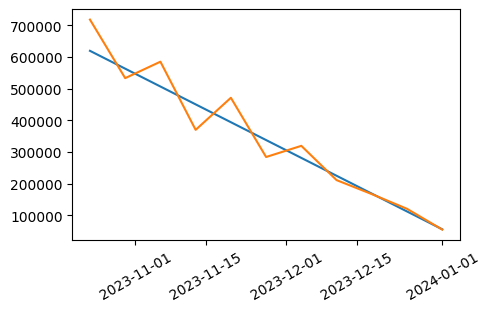

In [26]:
pp.figure(figsize=(5,3))
pp.plot(t, cleanplays)
pp.plot(t, noisyplays)
pp.xticks(rotation=30); # angled tick labels are more readable

In [27]:
def history(song_id):
    duration = np.random.randint(10, 50)

    t = pd.date_range(start=songs.loc[song_id].release,
                      end=songs.loc[song_id].release + pd.Timedelta(weeks=duration),
                      freq='W-MON')[:duration]

    initial_plays = np.random.randint(500000, 1000000)
    plays = initial_plays * np.linspace(1, 0, duration) * np.random.uniform(0.8, 1.2, duration)
    
    return pd.DataFrame({'song_id': song_id, 'plays': plays.astype(int), 'date': t})

In [28]:
history(1).head()

,song_id,plays,date
0,1,874851,2025-01-27
1,1,695723,2025-02-03
2,1,866506,2025-02-10
3,1,669877,2025-02-17
4,1,662718,2025-02-24


In [29]:
histories = pd.concat([history(song_id) for song_id in songs.index], axis=0) \
              .reset_index().rename(columns={'index': 'week'})

In [30]:
histories

,week,song_id,plays,date
0,0,0,833291,2023-10-23
1,1,0,759012,2023-10-30
2,2,0,663836,2023-11-06
3,3,0,520675,2023-11-13
4,4,0,632636,2023-11-20
...,...,...,...,...
15208,25,499,87114,2024-06-03
15209,26,499,62761,2024-06-10
15210,27,499,33710,2024-06-17
15211,28,499,19598,2024-06-24


In [31]:
histories = histories[(histories.date > pd.Timestamp.today() - pd.Timedelta(weeks=52)) &
                      (histories.date <= pd.Timestamp.today())]

In [32]:
histories = histories.sort_values(['date', 'plays'], ascending=[True, False])

In [33]:
topten = histories.groupby('date').head(10).set_index('date')
topten

,week,song_id,plays
date,,,
2024-06-17,2,23,1058119
2024-06-17,6,397,1038269
2024-06-17,2,185,952857
2024-06-17,0,324,907225
2024-06-17,4,395,897736
...,...,...,...
2025-06-09,2,71,980463
2025-06-09,2,235,967591
2025-06-09,7,114,926272


In [34]:
topten.loc['2024-09-09']

,week,song_id,plays
date,,,
2024-09-09,4,233,949678
2024-09-09,4,476,934337
2024-09-09,3,161,933223
2024-09-09,1,481,794479
2024-09-09,8,189,783898
2024-09-09,3,288,780541
2024-09-09,7,148,730784
2024-09-09,0,435,727091
2024-09-09,4,222,724520


In [35]:
topten['rank'] = topten.groupby('date').plays.rank(ascending=False)

In [36]:
topten

,week,song_id,plays,rank
date,,,,
2024-06-17,2,23,1058119,1.0
2024-06-17,6,397,1038269,2.0
2024-06-17,2,185,952857,3.0
2024-06-17,0,324,907225,4.0
2024-06-17,4,395,897736,5.0
...,...,...,...,...
2025-06-09,2,71,980463,6.0
2025-06-09,2,235,967591,7.0
2025-06-09,7,114,926272,8.0


In [37]:
songs.head()

,title,release,artist_id,genre
song_id,,,,
0,North itself,2023-10-21,51,Alternative
1,Bag new issue part,2025-01-26,14,Reggae
2,Assume generation,2025-06-01,77,Punk
3,Program new reduce,2023-10-27,24,Alternative
4,Easy ground pick on,2025-02-26,61,Country


In [38]:
artists.head()

,name,dob,birthplace,genre
artist_id,,,,
0,Lisa Moyer,1972-01-18,East Anthonymouth MP,Electronic
1,Richard Williams,1949-07-21,Yvettebury VI,Punk
2,Seth Quinn,1949-05-06,Mendozaport NJ,Electronic
3,Alyssa Terry,1958-09-13,New Derricktown DC,Hip Hop
4,Jacob Stewart,1969-12-11,Haydenport KY,Hip Hop


In [39]:
merged = topten.merge(songs, left_on='song_id', right_index=True) \
               .merge(artists.name, left_on='artist_id', right_index=True)
merged

,week,song_id,plays,rank,title,release,artist_id,genre,name
date,,,,,,,,,
2024-06-17,2,23,1058119,1.0,Great shake within,2024-05-30,95,R&B,Joshua Navarro
2024-06-17,6,397,1038269,2.0,Hair black,2024-05-04,1,Punk,Richard Williams
2024-06-17,2,185,952857,3.0,Thought power,2024-05-31,64,Blues,Regina Douglas
2024-06-17,0,324,907225,4.0,Performance,2024-06-17,46,Electronic,Nicholas Johnson
2024-06-17,4,395,897736,5.0,Play change act,2024-05-19,58,Hip Hop,Andrew Young
...,...,...,...,...,...,...,...,...,...
2025-06-09,2,71,980463,6.0,Large onto name,2025-05-26,1,Punk,Richard Williams
2025-06-09,2,235,967591,7.0,Window now fact buy,2025-05-23,49,Pop,Mark Hart
2025-06-09,7,114,926272,8.0,Year today more,2025-04-16,49,Pop,Mark Hart


In [40]:
first = merged.query('rank == 1').groupby('name').title.count().sort_values(ascending=False).head()
first

name
Lisa Moyer         6
Kenneth Bailey     5
Shawn Velasquez    4
Jessica Johnson    3
Roger Reyes        3
Name: title, dtype: int64

In [41]:
merged[(merged['rank'] == 1) & (merged['name'] == first.index[0])]

,week,song_id,plays,rank,title,release,artist_id,genre,name
date,,,,,,,,,
2024-07-08,1,192,1157738,1.0,Medical these home,2024-06-26,0,Electronic,Lisa Moyer
2024-07-15,2,192,1100295,1.0,Medical these home,2024-06-26,0,Electronic,Lisa Moyer
2024-07-22,3,192,1070154,1.0,Medical these home,2024-06-26,0,Electronic,Lisa Moyer
2024-07-29,4,192,1022227,1.0,Medical these home,2024-06-26,0,Electronic,Lisa Moyer
2025-05-12,0,300,1044274,1.0,Lot power next,2025-05-10,0,Electronic,Lisa Moyer
2025-05-19,1,300,1062703,1.0,Lot power next,2025-05-10,0,Electronic,Lisa Moyer


In [42]:
merged.to_hdf('songtables.h5', key='topten')
artists.to_hdf('songtables.h5', key='artists')
songs.to_hdf('songtables.h5', key='songs')

In [43]:
h5 = pd.HDFStore('songtables.h5')

In [44]:
h5.keys()

['/artists', '/songs', '/topten']

In [45]:
h5['/artists']

,name,dob,birthplace,genre
artist_id,,,,
0,Lisa Moyer,1972-01-18,East Anthonymouth MP,Electronic
1,Richard Williams,1949-07-21,Yvettebury VI,Punk
2,Seth Quinn,1949-05-06,Mendozaport NJ,Electronic
3,Alyssa Terry,1958-09-13,New Derricktown DC,Hip Hop
4,Jacob Stewart,1969-12-11,Haydenport KY,Hip Hop
...,...,...,...,...
95,Joshua Navarro,1998-02-16,Shawfurt MP,R&B
96,Amber Murphy,1957-11-22,Osbornestad MH,Rock
97,Carlos Mitchell,1974-07-03,New Amandahaven IN,Punk
